<a href="https://colab.research.google.com/github/TwoGunTitan/Fake-Review-detection/blob/main/Data_Visualization_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


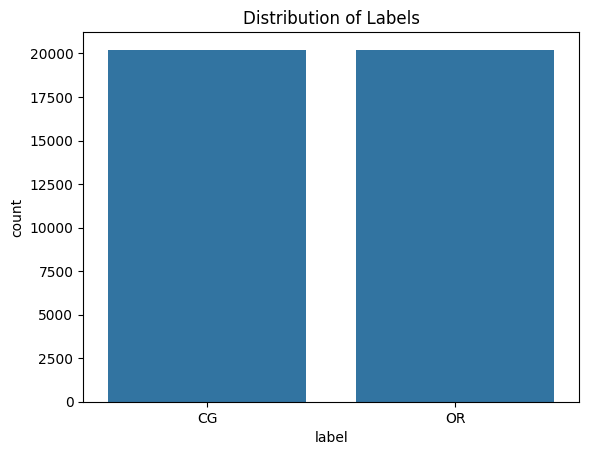

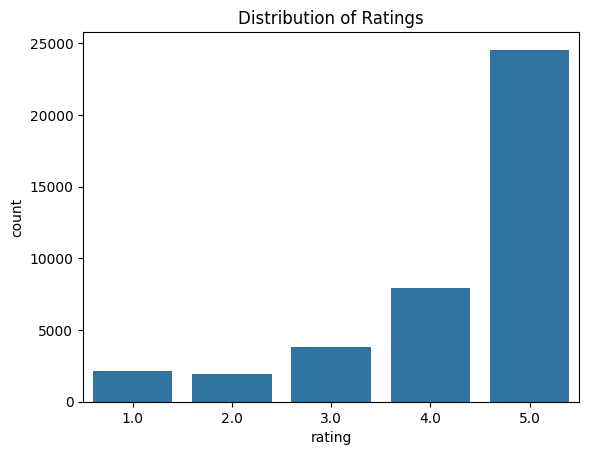

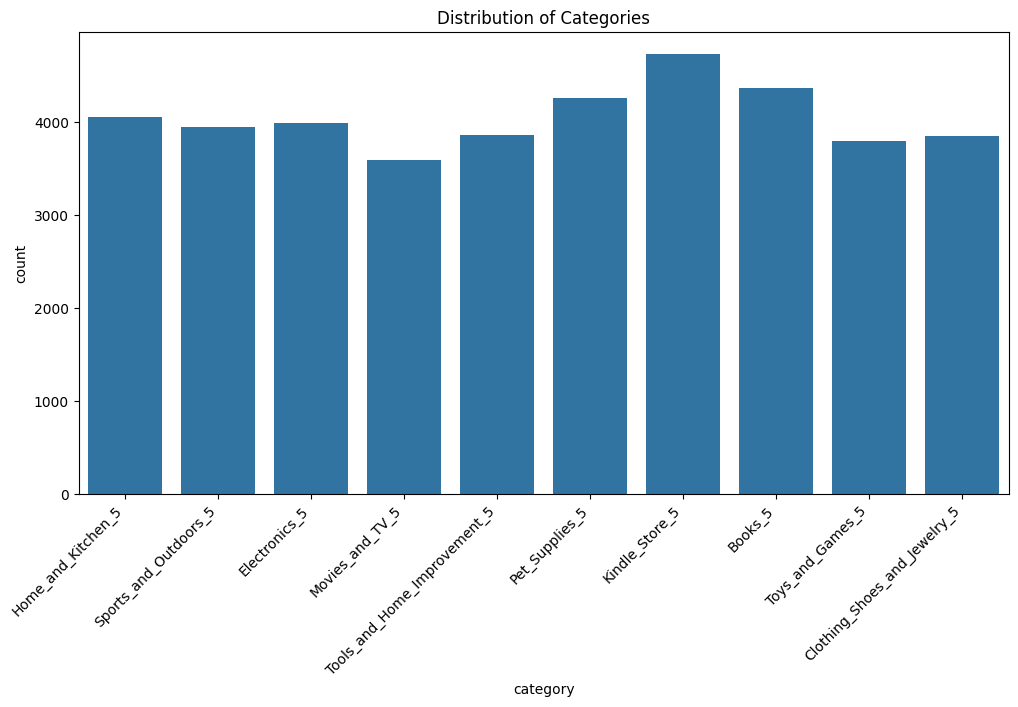

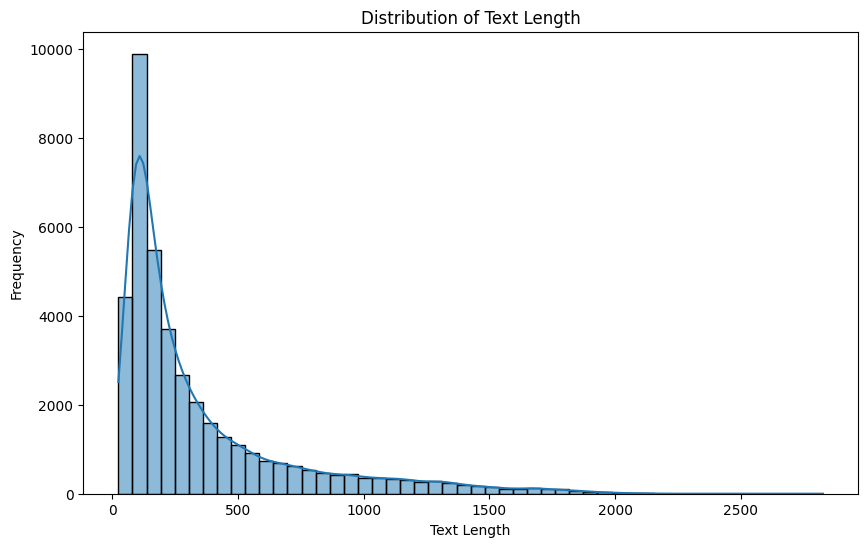

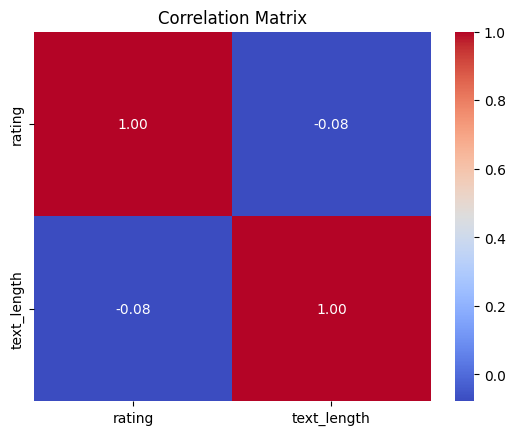

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/fake_reviews_dataset.csv'
df = pd.read_csv(file_path)

# Visualize distribution of target variable ('label')
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.show()

# Visualize distribution of ratings
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.show()

# Visualize distribution of categories
plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=df)
plt.title('Distribution of Categories')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualize the distribution of text length
df['text_length'] = df['text_'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Visualize the correlation between numerical features
numerical_features = ['rating', 'text_length']
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

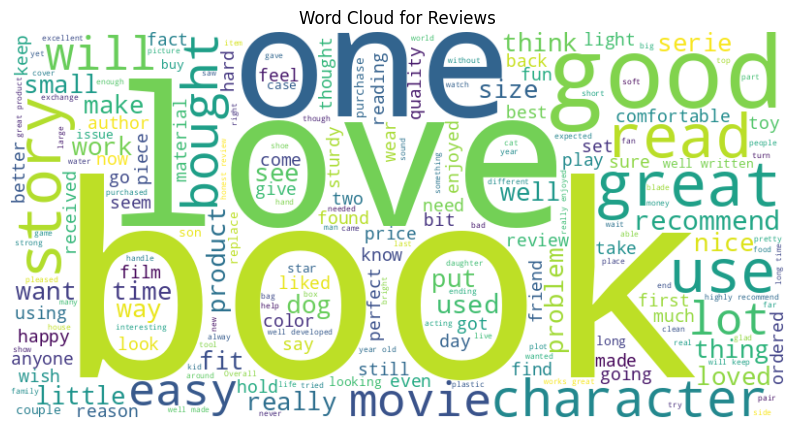

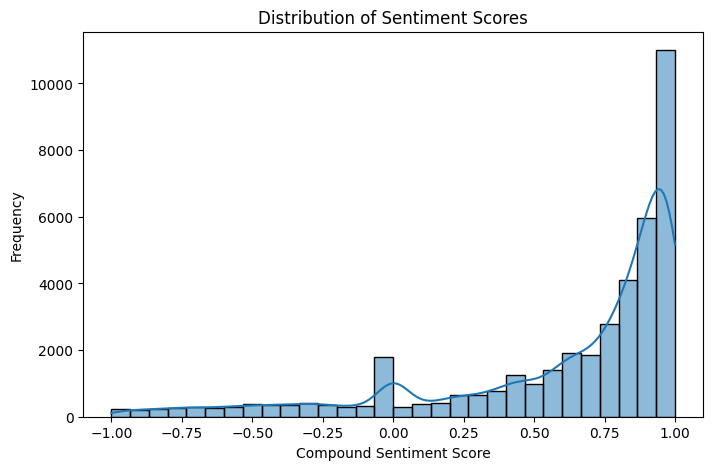

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the dataset
file_path = '/content/drive/MyDrive/fake_reviews_dataset.csv'
df = pd.read_csv(file_path)

# Visualize word cloud for the entire corpus
text_corpus = ' '.join(df['text_'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews')
plt.show()

# Sentiment analysis using NLTK
sia = SentimentIntensityAnalyzer()
df['compound'] = df['text_'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Visualize sentiment distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['compound'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()